In [1]:
# SQLAlchemy
%matplotlib inline
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
# Path to sqlite
database_path = "employees.sqlite"

In [2]:
engine = create_engine(f"sqlite:///{database_path}")

In [3]:
connection = engine.connect()

In [4]:
import pandas as pd

In [5]:
employees = pd.read_csv("../Instructions/data/employees.csv")
salaries = pd.read_csv("../Instructions/data/salaries.csv")
titles = pd.read_csv("../Instructions/data/titles.csv")

In [ ]:
employees.to_sql("employees_table", connection)

In [ ]:
salaries.to_sql("salaries_table", connection)
titles.to_sql("titles_table", connection)

In [45]:
employees_salary = pd.read_sql("SELECT employees_table.emp_no, salaries_table.salary\
                                FROM employees_table\
                                JOIN salaries_table\
                                ON employees_table.emp_no = salaries_table.emp_no", connection)

In [46]:
employees_salary

,emp_no,salary
0,473302,40000
1,475053,53422
2,57444,48973
3,421786,40000
4,282238,40000
...,...,...
300019,464231,69696
300020,255832,75355
300021,76671,61886
300022,264920,62772


<function matplotlib.pyplot.show(*args, **kw)>

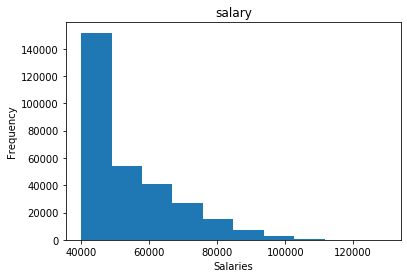

In [55]:
employees_salary.hist(column="salary", grid=False)
plt.xlabel("Salaries")
plt.ylabel("Frequency")
plt.show

In [30]:
titles_by_salary = pd.read_sql("SELECT titles_table.title, salaries_table.salary\
                                FROM titles_table\
                                JOIN employees_table ON titles_table.title_id = employees_table.emp_title_id\
                                JOIN salaries_table ON employees_table.emp_no = salaries_table.emp_no", connection)

In [32]:
titles_by_salary_groupby = titles_by_salary.groupby("title").mean()
titles_by_salary_groupby = titles_by_salary_groupby.reset_index()
titles_by_salary_groupby

,title,salary
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


<function matplotlib.pyplot.show(*args, **kw)>

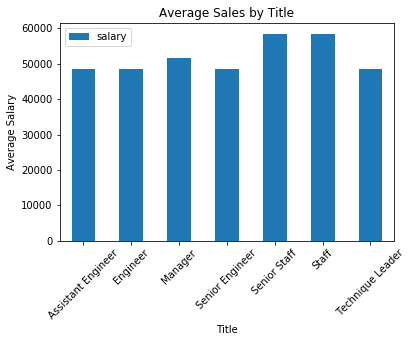

In [56]:
ax = titles_by_salary_groupby.plot.bar(x="title", y="salary", title ="Average Sales by Title", rot=45)
ax.set_xlabel("Title")
ax.set_ylabel("Average Salary")
plt.show